## This file use Olivetti Faces dataset to achieve a face classifier.

![title](olivettifaces.gif)

In [1]:
# Imports
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

# Download Olivetti faces dataset
olivetti = fetch_olivetti_faces()
X = olivetti.images
y = olivetti.target
# Print info on shapes and reshape where necessary
print("Original x shape:", X.shape)
print("y shape", y.shape)


Original x shape: (400, 64, 64)
y shape (400,)


In [2]:
import keras

Using TensorFlow backend.


In [4]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [5]:
# TODO
import keras.backend as K
K.clear_session()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [7]:
batch_size = 32
num_classes = 40
epochs = 100
data_augmentation = True
num_predictions = 40

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = optimizers.Adam(lr=0.0005) 
model.compile(loss='binary_crossentropy',
              optimizer=opt,
             metrics=['accuracy'])

x_train = x_train.reshape(((268, 64, 64,1)))
x_test = x_test.reshape(((132, 64, 64,1)))
steps_per_epoch =  x_train.shape[0] // batch_size
validation_steps =  x_test.shape[0] // batch_size

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
hist = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    validation_data=(x_test, y_test))

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8/8 [==============================] - 7s 821ms/step - loss: 0.1175 - acc: 0.9750 - val_loss: 0.1172 - val_acc: 0.9750
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.1169 - acc: 0.9750 - val_loss: 0.1171 - val_acc: 0.9750
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.1168 - acc: 0.9750 - val_loss: 0.1172 - val_acc: 0.9750
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.1165 - acc: 0.9750 - val_loss: 0.1186 - val_acc: 0.9750
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 0.1168 - acc: 0.9750 - val_loss: 0.1177 - val_acc: 0.9750
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.1167 - acc: 0.9750 - val_loss: 0.1175 - val_acc: 0.9750
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1161 - acc: 0.9750 - val_loss: 0.1189 - val_acc: 0.9750
Epoch 8/100
8/8 [========================

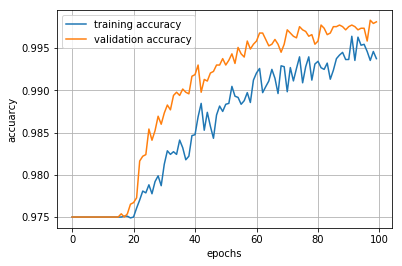

In [9]:
# Plot the training accuracy and validation accuracy curves on the same figure.
import matplotlib.pyplot as plt
%matplotlib inline
# TO DO
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])